In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) dans une fenêtre qt externe au notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

In [41]:
df = pd.read_csv('data/df_train.csv')
df.columns

Index(['Unnamed: 0', 'day', 'hashed_partner_id', 'hashed_campaign_id',
       'contextid', 'display_env', 'target_env', 'rtbtypeid',
       'rtbadvisibility', 'rtb_detectedlanguage', 'urlhash2', 'urlhash3',
       'urlhash4', 'user_country', 'hashed_affiliateid', 'hashed_app_id',
       'googleviewability', 'googlepagevertical', 'campaignscenario',
       'campaignvertical', 'campaignctrlast24h', 'is_interstitial',
       'dayssincelastvisitdouble', 'ltf_lastpartnerclicktimestamp',
       'ltf_nbglobalclick_4w', 'ltf_nbglobaldisplay_4w',
       'ltf_nbglobaldisplaysincelastpartnerproductview',
       'ltf_nbpartnerdisplayssincelastclick', 'ltf_nbpartnerclick_4w',
       'ltf_nbpartnerdisplay_4w', 'ltf_nbpartnersales_4w',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplaypartnerapprox_1d_sum_xdevice',
       'nbdisplayaffiliateapprox_1d_sum_xdevice',
       'nbdisplayglobalapprox_1d_s

In [42]:
# Recodage de certaines modalités afin de réordonner par ordre croissant d'engagement
df["contextid"] = df["contextid"].replace(0,1)
df["contextid"] = df["contextid"].replace(10,3)

In [43]:
# Remplacement des valeurs manquantes par des 0 dans les variables commençant par ltf
df['ltf_lastpartnerclicktimestamp'] = df['ltf_lastpartnerclicktimestamp'].fillna(0)
df['ltf_nbglobalclick_4w'] = df['ltf_nbglobalclick_4w'].fillna(0)
df['ltf_nbglobaldisplay_4w'] = df['ltf_nbglobaldisplay_4w'].fillna(0)
df['ltf_nbglobaldisplaysincelastpartnerproductview'] = df['ltf_nbglobaldisplaysincelastpartnerproductview'].fillna(0)
df['ltf_nbpartnerdisplayssincelastclick'] = df['ltf_nbpartnerdisplayssincelastclick'].fillna(0)
df['ltf_nbpartnerclick_4w'] = df['ltf_nbpartnerclick_4w'].fillna(0)
df['ltf_nbpartnerdisplay_4w'] = df['ltf_nbpartnerdisplay_4w'].fillna(0)
df['ltf_nbpartnersales_4w'] = df['ltf_nbpartnersales_4w'].fillna(0)
df['ltf_nbpartnerdisplay_90d'] = df['ltf_nbpartnerdisplay_90d'].fillna(0)
df['ltf_nbpartnerclick_90d'] = df['ltf_nbpartnerclick_90d'].fillna(0)
df['ltf_nbpartnersales_90d'] = df['ltf_nbpartnersales_90d'].fillna(0)
# Idem ici
df['nbdisplay_1hour'] = df['nbdisplay_1hour'].fillna(0)
df['nbdisplaypartnerapprox_1d_sum_xdevice'] = df['nbdisplaypartnerapprox_1d_sum_xdevice'].fillna(0)
df['nbdisplayaffiliateapprox_1d_sum_xdevice'] = df['nbdisplayaffiliateapprox_1d_sum_xdevice'].fillna(0)
df['nbdisplayglobalapprox_1d_sum_xdevice'] = df['nbdisplayglobalapprox_1d_sum_xdevice'].fillna(0)	
df['campaignctrlast24h'] = df['campaignctrlast24h'].fillna(0)

In [44]:
# Suppression de l'appareil cliquant un nombre aberrant de fois
df.drop(df.index[df['hashed_xd_id'] == r"b'\x12\xb97|\xbe~\\\x94\xe8\xa7\r\x9d#\x92\x95#\xd1J\xfa\x95G\x93\x13\x0f\x8a9Y\xc7\xb8I\xac\xa8'"], inplace = True)

In [45]:
# Les nombres de clics ne sont plus aberrants
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\xc4\xc8\xb7\xb0\x7faU\x01D5\xfe\x96\xb7\x165\xff\x90\xc2\xcd;\xbf^\\\x10\xf9z*\x0e\xc6%4v',9
b'\xadk\x10\x99k\\\x7f\xef\xf3\x86\xe6f\\{)\xd8\x14t\x8b\x8b\x16\x7f\xb0z)\xd4\n\xe7&dN\xe9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
b'-U\x87^\xe4cxaDm\xac\xdc\xfd~B(7.\x9e\xdd\x8c_\xac \xce\xcf%\xf5S\xa0\xe4\xd0',9
"b""\xbaI`\x80\xf3\x0b\xa4\xbc\x84'\x1f\xdeA\xecv\xbb\xa6:W\xf3\xe8\xcb\xf6~L\x91\xfeS\x90q\xcb~""",9
b'\x94\x80\xba$\xf7\xcf\x17-#\x9e{\x10\xdd\xa1\xa4\xc2\x86\x86\xf3\xd1\xb2\xf7\x005\xb6\xf2\xef\xdc\xa6\x1a&x',8
b'\xef[E\xf1*a\xc1l\x14O\xd2\xdd\x1e\xa5(i\xa0\x80f\xa5X\xd7\xedq\xd0R\x1d\x97\x10\xd9\xca;',8


In [46]:
# Shuffling
df = df.sample(frac=1).reset_index(drop=True)

In [47]:
# Variables avec valeurs manquantes
pd.DataFrame({"Valeurs manquantes":df[df.columns[df.isnull().sum() != 0]].isnull().sum(), "Proportion manquante":df[df.columns[df.isnull().sum() != 0]].isnull().sum()/len(df)})

,Valeurs manquantes,Proportion manquante
rtbtypeid,6911,0.004291
rtbadvisibility,6911,0.004291
rtb_detectedlanguage,6911,0.004291
urlhash2,150948,0.093728
urlhash3,150948,0.093728
urlhash4,150948,0.093728
user_country,257,0.000160
hashed_app_id,605846,0.376186
googleviewability,1108837,0.688507
googlepagevertical,6911,0.004291


In [48]:
df['display_size'] = df['display_width']*df['display_height']

In [49]:
# On enlève des variables ltf grâce aux corrélations visibles dans la matrice. 
df_acp = df[['contextid','dayssincelastvisitdouble','campaignctrlast24h','nbdisplay_1hour','nbdayssincelastclick','display_size','ltf_nbpartnerdisplayssincelastclick','ltf_nbglobaldisplay_4w','ltf_nbpartnerclick_4w','ltf_nbpartnerdisplay_4w','ltf_nbpartnersales_4w','nbdisplayglobalapprox_1d_sum_xdevice','is_display_clicked']]
df_acp = df_acp.dropna().reset_index(drop=True)

In [50]:
colors = np.array(['r' if (df_acp['is_display_clicked'][i] == 0) else 'g' for i in range(len(df_acp))])
df_acp = df_acp.drop(['is_display_clicked'], axis=1)

In [51]:
len(df_acp)/len(df)

1.0

In [52]:
sc = StandardScaler()
Z = sc.fit_transform(df_acp)
Z

array([[-1.92104218, -0.44867976,  0.66483547, ..., -0.07788934,
        -0.01389272, -0.49572077],
       [ 0.14873565,  0.5031451 , -1.85156601, ..., -0.07788934,
        -0.01389272, -0.04028707],
       [ 0.14873565,  1.88473849, -0.71314479, ..., -0.07788934,
        -0.01389272, -0.51591094],
       ...,
       [ 0.14873565,  1.17310701,  0.39321033, ..., -0.07788934,
        -0.01389272, -0.27254414],
       [-1.92104218, -0.44867976, -0.06445264, ..., -0.07788934,
        -0.01389272,  4.59423189],
       [ 0.97664678, -0.27709917, -0.91168906, ..., -0.07788934,
        -0.01389272,  0.39707043]])

In [53]:
acp = PCA(svd_solver='full')

In [54]:
# Calcul des coordonnées factorielles
coord = acp.fit_transform(Z)
# Vérification du nombre de composantes principales
print(acp.n_components_)

12


In [55]:
print(acp.explained_variance_ratio_)

[0.19421456 0.10651577 0.10082156 0.09315579 0.08545678 0.08311288
 0.07358531 0.07040916 0.06698091 0.05946111 0.0444153  0.02187087]


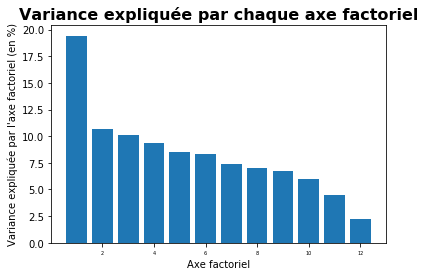

In [56]:
plt.figure(figsize=(6,4))
plt.bar(np.arange(1,acp.n_components_+1),acp.explained_variance_ratio_*100)
plt.title("Variance expliquée par chaque axe factoriel", size=16, fontweight='bold')
plt.ylabel("Variance expliquée par l'axe factoriel (en %)", size=10)
plt.xlabel("Axe factoriel", size=10)
plt.show()

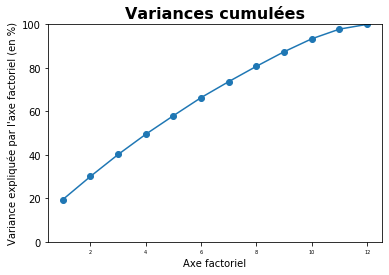

In [57]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,acp.n_components_+1),acp.explained_variance_ratio_.cumsum()*100,  marker = 'o')
plt.title("Variances cumulées", size=16, fontweight='bold')
plt.ylim(0, 100)
plt.ylabel("Variance expliquée par l'axe factoriel (en %)", size=10)
plt.xlabel("Axe factoriel", size=10)
plt.show()

In [58]:
coord_not_cliqued = [ [] for _ in range(acp.n_components_)]
coord_cliqued = [ [] for _ in range(acp.n_components_)]

for i in range(len(coord[:,0])):
    if df['is_display_clicked'][i] == 0:
        for j in range(acp.n_components_):
            coord_not_cliqued[j].append(coord[i,j])
    else:
        for j in range(acp.n_components_):
            coord_cliqued[j].append(coord[i,j])

In [59]:
#def affichage_plan_factoriel(i, j, pourcentage=1, equal=False, markersize=0.75, verbose=False):
#    """
#    pourcentage: proprotion de points à afficher
#    equal: si True, autant de points rouges que de points verts
#    """
#    plt.figure(figsize=(6,4))
#
#    if not equal:
#        N_not = int(1/pourcentage)
#        N = int(1/pourcentage)
#    
#
#    if equal:
#        coeff = len(coord_cliqued[0]) / len(coord_not_cliqued[0])
#
#        N_not = int(1/(pourcentage*coeff))
#        N = int(1/pourcentage)
#
#        # N_not = int(1/pourcentage)
#        # N = int(coeff/pourcentage)
#
#    if verbose:
#        print(f"N_not : {N_not}")
#        print(f"N : {N}")
#        print(f"Nombre de points rouges : {len(coord_not_cliqued[0][::N_not])}")
#        print(f"Nombre de points verts : {len(coord_cliqued[0][::N])}")
#
#    plt.plot(coord_not_cliqued[i-1][::N_not], coord_not_cliqued[j-1][::N_not], '.', color='r', #linestyle="None", markersize=markersize)
#    plt.plot(coord_cliqued[i-1][::N], coord_cliqued[j-1][::N], '.', color='g', linestyle="None", #markersize=markersize)
#    plt.xlabel(f'Axe {i}')
#    plt.ylabel(f'Axe {j}')
#    plt.title(f'Plan (Axe {i}, Axe {j})')
#    plt.legend(['Pas cliqué', 'Cliqué'])
#    # plt.savefig('plan_axe1_axe2.png', dpi = 500, bbox_inches='tight', figsize=(10,6))
#    # plt.close()
#    plt.show()

def affichage_plan_factoriel(i,j):
    plt.figure(figsize=(6,4))
    plt.xlabel(f'Axe {i}')
    plt.ylabel(f'Axe {j}')
    plt.title(f'Plan (Axe {i}, Axe {j})')
    plt.scatter(coord[:,i-1], coord[:,j-1], c=colors, marker=".", s=0.75)
    plt.show()

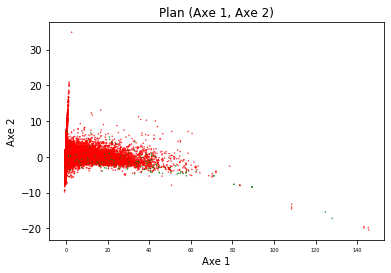

In [60]:
affichage_plan_factoriel(1, 2)

In [61]:
# On supprime les observations marginales
axe1 = np.array(coord[:,0])
df_acp.drop(df_acp.index[axe1 > 115], inplace=True)
colors = colors[axe1 <= 115]

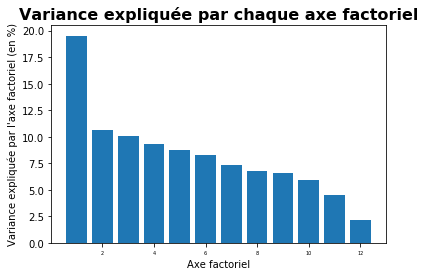

In [62]:
sc = StandardScaler()
Z = sc.fit_transform(df_acp)
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
plt.figure(figsize=(6,4))
plt.bar(np.arange(1,acp.n_components_+1),acp.explained_variance_ratio_*100)
plt.title("Variance expliquée par chaque axe factoriel", size=16, fontweight='bold')
plt.ylabel("Variance expliquée par l'axe factoriel (en %)", size=10)
plt.xlabel("Axe factoriel", size=10)
plt.show()

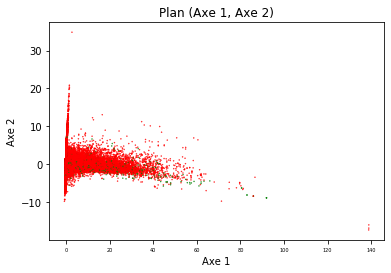

In [63]:
affichage_plan_factoriel(1, 2)

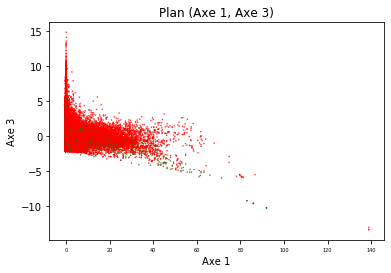

In [64]:
affichage_plan_factoriel(1, 3)

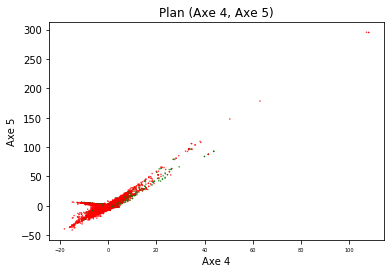

In [73]:
affichage_plan_factoriel(4,5)

In [65]:
n = len(df_acp)
p = len(df_acp.columns)

eigval = (n-1)/n*acp.explained_variance_
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

In [66]:
def affichage_cercle_corr(ax1, ax2):
    fig, axes = plt.subplots(figsize=(5,5))
    axes.set_xlim(-1.05, 1.05)
    axes.set_ylim(-1.05, 1.05)

    for j in range(p):
        axes.arrow(0, 0, corvar[j,ax1], corvar[j,ax2], head_width=0.005, head_length=0.01, fc='grey', ec='grey')
        plt.annotate(df_acp.columns[j], (corvar[j,ax1],corvar[j,ax2]), size=8, color='r')

    plt.plot([-1, 1], [0, 0],color='silver', linestyle='-', linewidth=1)
    plt.plot([0, 0], [-1, 1],color='silver', linestyle='-', linewidth=1)

    cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
    axes.add_artist(cercle)

    plt.show()

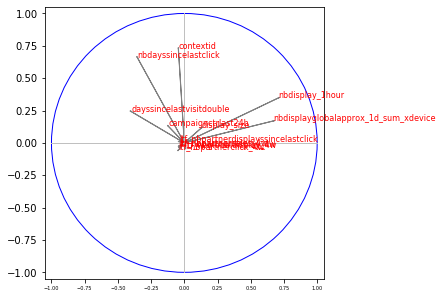

In [67]:
affichage_cercle_corr(1,2)

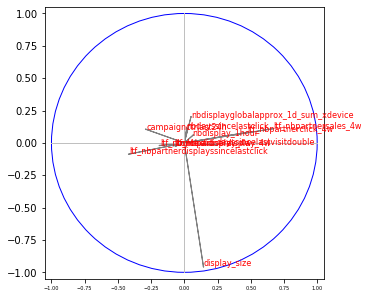

In [68]:
affichage_cercle_corr(4,5)

In [69]:
print(pd.Series(coord_cliqued[3]).describe(), '\n')
print(pd.Series(coord_not_cliqued[3]).describe())

count    91752.000000
mean         0.479536
std          1.278250
min        -11.769109
25%         -0.193119
50%          0.240426
75%          1.191703
max         60.189918
dtype: float64 

count    1.518742e+06
mean    -2.897031e-02
std      1.035357e+00
min     -1.556756e+01
25%     -5.023613e-01
50%     -9.316019e-02
75%      3.572699e-01
max      5.298924e+01
dtype: float64


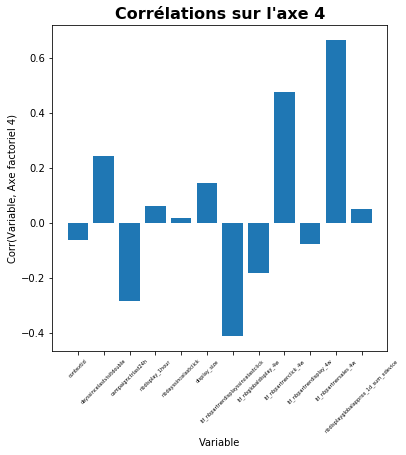

In [70]:
plt.figure(figsize=(6,6))
plt.rc('xtick', labelsize=5)
plt.xticks(rotation=45)
plt.bar(np.arange(1,acp.n_components_+1), corvar[:,4], tick_label=df_acp.columns)
plt.title("Corrélations sur l'axe 4", size=16, fontweight='bold')
plt.ylabel("Corr(Variable, Axe factoriel 4)", size=10)
plt.xlabel("Variable", size=10)
plt.show()

In [71]:
def affichage_3d_factoriel(i, j, k, pourcentage=1, equal=False, markersize=1, verbose=False):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    if not equal:
        N_not = int(1/pourcentage)
        N = int(1/pourcentage)
    
    if equal:
        coeff = len(coord_cliqued[0]) / len(coord_not_cliqued[0])

        N_not = int(1/(pourcentage*coeff))
        N = int(1/pourcentage)

        # N_not = int(1/pourcentage)
        # N = int(coeff/pourcentage)

    if verbose:
        print(f"N_not : {N_not}")
        print(f"N : {N}")
        print(f"Nombre de points rouges : {len(coord_not_cliqued[0][::N_not])}")
        print(f"Nombre de points verts : {len(coord_cliqued[0][::N])}")

    ax.scatter(coord_not_cliqued[i-1][::N_not], coord_not_cliqued[j-1][::N_not], coord_not_cliqued[k-1][::N_not], s=markersize, color='r', linestyle="None", marker='o')
    ax.scatter(coord_cliqued[i-1][::N], coord_cliqued[j-1][::N], coord_cliqued[k-1][::N], s=markersize, color='g', linestyle="None", marker='o')
    ax.set_xlabel(f'Axe {i}')
    ax.set_ylabel(f'Axe {j}')
    ax.set_zlabel(f'Axe {k}')
    plt.title(f'Plan (Axe {i}, Axe {j}, Axe {k})')
    plt.legend(['Pas cliqué', 'Cliqué'])
    plt.show()

In [72]:
affichage_3d_factoriel(1, 2, 3, pourcentage=0.01, equal=True, markersize=5, verbose=True)

ValueError: Unknown projection '3d'